# Beamforming first simulations

In [92]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from cmath import log10

In [93]:

def beamforming(d, N, theta0, sigma0, sigma_n, wl, ns, nc):

    # For now, we only consider a single source image, the source is considered static over time and frequence
    # Simulate source signal as a Gaussien variable
    s = np.random.normal(0, sigma0, N)
    #  s = np.random.normal(0, sigma0, size=(ns,N))

    # geometric delay
    tau = d*np.sin(theta0)/wl  # equivalent to d*np.sin(theta0)*f0/c 
    # delay array
    J = np.arange(0,10)
    a = np.exp(-1j*2*np.pi*J*tau)

    # reshape vectors
    s = s.reshape(1,-1)
    a = a.reshape(-1,1)

    # compute the received signal : Represent signal delay across array as a delay line
    # noise signal
    #n = np.random.normal(0,1,(nc,N))

    n = np.random.normal(0,sigma_n, (10,100))
    SNR = 10*log10(sigma0/sigma_n)
    x = a@s + n
    #x = x.reshape(-1,1)

    # Compute correlation matrix
    R = x@np.conjugate(x).T/N
    print('x ', x.shape)
    print('r ', R.shape)
    #print(np.conjugate(x).shape)

    #print(R.shape)
    # Compute beamforming
    # theta varies between -pi and pi
    thetas = np.linspace(-90,91,100)
    thetas = np.deg2rad(thetas)

    # for each theta compute beam
    beams = list()
    for theta in thetas:
        tau = d*np.sin(theta)/wl
        w = np.exp(-1j*2*np.pi*J.T*tau)
        B = np.conjugate(w).T@R@w
        beams.append(B)
    return beams, thetas.reshape(-1,1)

In [94]:
# Note : d/lambda <= 1/2
theta0 = np.deg2rad(50)
beams, thetas = beamforming(d=10, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=20, ns=1, nc=10)

x  (10, 100)
r  (10, 10)


## Beam response plot
Fix w and plot $|y[n]|$ as a function of signal arrival angle $\theta$

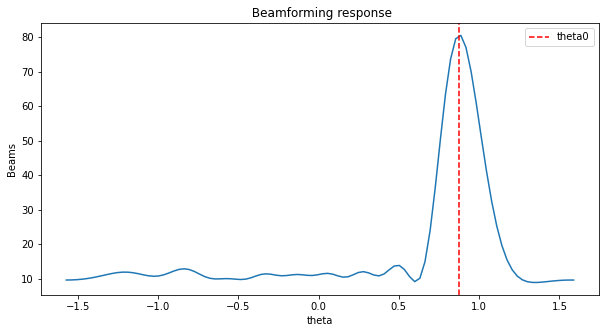

In [95]:
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.axvline(x = theta0 , color = 'r', linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response")
plt.legend()
plt.show() 

## Change theta0 

x  (10, 100)
r  (10, 10)


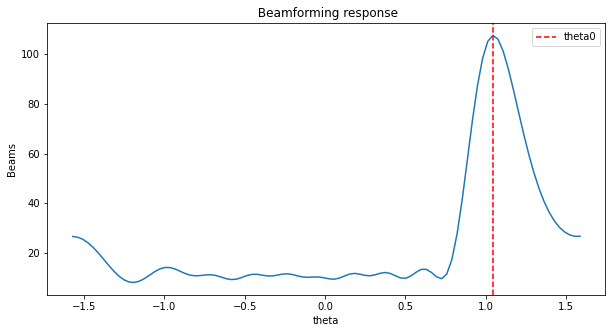

In [98]:
theta0 = np.deg2rad(60)
beams, thetas = beamforming(d=10, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=20, ns=1, nc=10)

plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.axvline(x = theta0 , color = 'r', linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response")
plt.legend()
plt.show() 

## Change source intensity 

x  (10, 100)
r  (10, 10)


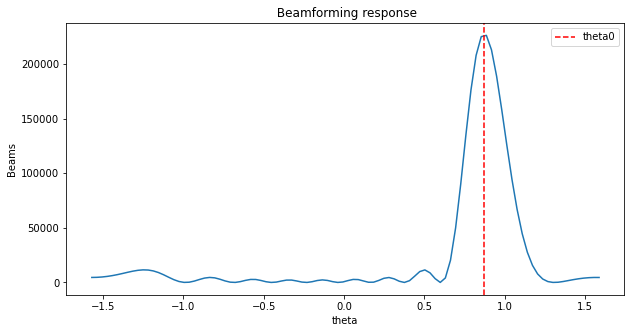

In [100]:
theta0 = np.deg2rad(50)

beams, thetas = beamforming(d=10, N=100, theta0=theta0, sigma0=50, sigma_n=1, wl=20, ns=1, nc=10) 
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.axvline(x = theta0 , color = 'r', linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response")
plt.legend()
plt.show() 

## Change wavelength parameter

x  (10, 100)
r  (10, 10)


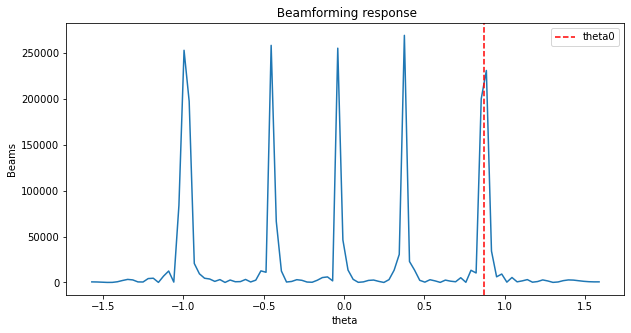

In [104]:
theta0 = np.deg2rad(50)

beams, thetas = beamforming(d=10, N=100, theta0=theta0, sigma0=50, sigma_n=1, wl=4, ns=1, nc=10) 
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.axvline(x = theta0 , color = 'r', linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response")
plt.legend()
plt.show() 

# Let's consider multiple sources 

In [147]:

def beamforming(d, N, theta0, sigma0, sigma_n, wl, ns, nc):

    # For now, we only consider a single source image, the source is considered static over time and frequence
    # Simulate 'ns' source signal as a Gaussien variable
    s = np.random.normal(0, sigma0, size=(ns,N))
    print('s ', s.shape)

    # geometric delay
    tau = d*np.sin(theta0)/wl  # equivalent to d*np.sin(theta0)*f0/c 
    # delay array
    a = np.zeros((nc, ns), dtype = "complex_")
    for n in range(nc):
        for m in range(ns):
            # If there exists more than one source.
            a[n][m] = np.exp(-1j*2*np.pi*d/wl*(n)*np.sin(theta0[m]))



    # compute the received signal : Represent signal delay across array as a delay line
    # noise signal
    #n = np.random.normal(0,1,(nc,N))

    n = np.random.normal(0,sigma_n, (10,100))
    print('n ', n.shape)
    print('a ', a.shape)
    SNR = 10*log10(sigma0/sigma_n)
    x = a@s + n
    #x = x.reshape(-1,1)

    # Compute correlation matrix
    R = x@np.conjugate(x).T/N
    print('x ', x.shape)
    print('r ', R.shape)
    #print(np.conjugate(x).shape)

    #print(R.shape)
    # Compute beamforming
    # theta varies between -pi/2 and pi/2
    thetas = np.linspace(-90,91,100)
    thetas = np.deg2rad(thetas)

    # for each theta compute beam
    beams = list()
    for theta in thetas:
        tau = d*np.sin(theta)/wl
        w = np.exp(-1j*2*np.pi*J.T*tau)
        B = np.conjugate(w).T@R@w
        beams.append(B)
    return beams, thetas.reshape(-1,1)

In [148]:
theta0 = np.array([np.deg2rad(50), np.deg2rad(30)])

beams, thetas = beamforming(d=10, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=20, ns=2, nc=10)

s  (2, 100)
n  (10, 100)
a  (10, 2)
x  (10, 100)
r  (10, 10)


s  (2, 100)
n  (10, 100)
a  (10, 2)
x  (10, 100)
r  (10, 10)


c:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


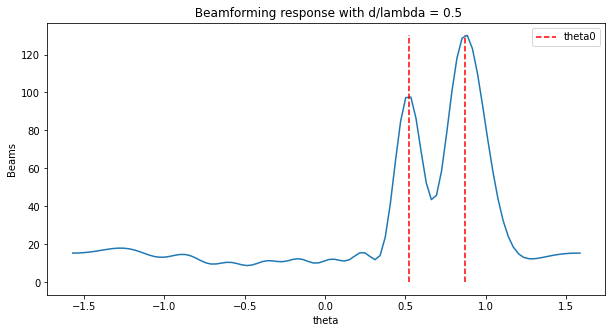

In [168]:
theta0 = np.array([np.deg2rad(50), np.deg2rad(30)])
d= 10
l = 20
beams, thetas = beamforming(d=d, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=l, ns=2, nc=10)
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.vlines(x = theta0 , color = 'r',ymin=0, ymax=max(beams), linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response with d/lambda = {}".format(d/l))
plt.legend()
plt.show() 

s  (2, 100)
n  (10, 100)
a  (10, 2)
x  (10, 100)
r  (10, 10)


c:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


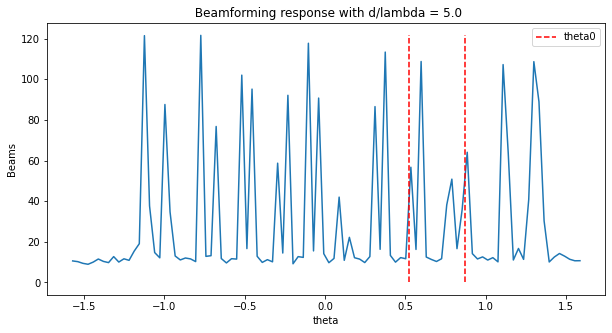

In [169]:
# Note : R=d/lambda <= 1/2
theta0 = np.array([np.deg2rad(50), np.deg2rad(30)])
# initialization
d=100
l= 20
# compute beamforming
beams, thetas = beamforming(d=d, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=l, ns=2, nc=10)
# plot figure
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.vlines(x = theta0 , color = 'r',ymin=0, ymax=max(beams), linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response with d/lambda = {}".format(d/l))
plt.legend()
plt.show() 

s  (2, 100)
n  (10, 100)
a  (10, 2)
x  (10, 100)
r  (10, 10)


c:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


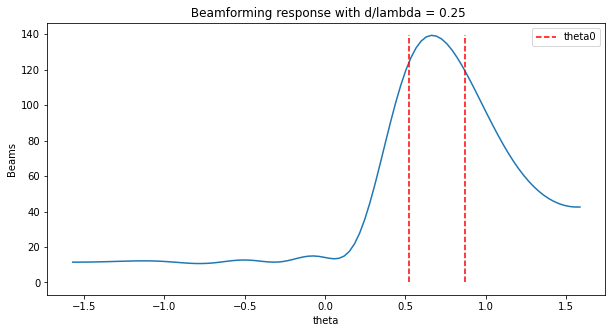

In [170]:
# Note : R=d/lambda <= 1/2
theta0 = np.array([np.deg2rad(50), np.deg2rad(30)])
# initialization
d=5
l = 20
# compute beamforming
beams, thetas = beamforming(d=d, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=l, ns=2, nc=10)
# plot figure
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.vlines(x = theta0 , color = 'r',ymin=0, ymax=max(beams), linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response with d/lambda = {}".format(d/l))
plt.legend()
plt.show() 

s  (2, 100)
n  (10, 100)
a  (10, 2)
x  (10, 100)
r  (10, 10)


c:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


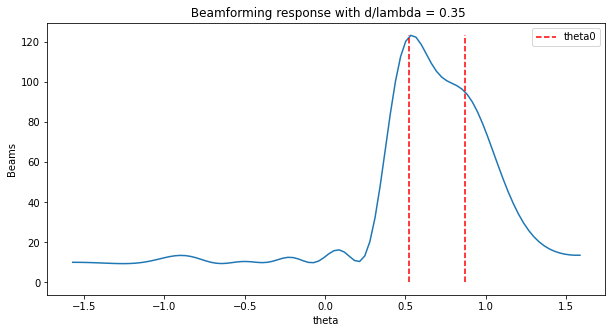

In [171]:
# Note : R=d/lambda <= 1/2
theta0 = np.array([np.deg2rad(50), np.deg2rad(30)])
# initialization
d = 7
l = 20
# compute beamforming
beams, thetas = beamforming(d=d, N=100, theta0=theta0, sigma0=1, sigma_n=1, wl=l, ns=2, nc=10)
# plot figure
plt.figure(figsize = (10, 5))
plt.plot(thetas, np.real(beams))
# only one line may be specified; full height
plt.vlines(x = theta0 , color = 'r',ymin=0, ymax=max(beams), linestyle='--',  label = 'theta0')
plt.xlabel('theta')
plt.ylabel('Beams')
plt.title(" Beamforming response with d/lambda = {}".format(d/l))
plt.legend()
plt.show() 